In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y1=data[['전국 관객수 분류']]

In [4]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-4-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-4-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [5]:
#다항 로지스틱
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
for i in ['auto', 'ovr','multinomial']:
    for j in ['newton-cg','sag','saga','lbfgs']:
        logistic=LogisticRegression(multi_class=i,solver=j)
        logistic1=LogisticRegression(multi_class=i,solver=j)
        logistic2=LogisticRegression(multi_class=i,solver=j)
        logistic.fit(X_train,y1_train)
        logistic1.fit(X_train1,y1_train1)
        logistic2.fit(X_train2,y1_train2)
        print(i,j)
        print("학습 데이터 점수 : {}".format(logistic.score(X_train,y1_train)))
        print("평가 데이터 점수 : {}".format(logistic.score(X_test,y1_test)))
        print("학습 데이터 점수1 : {}".format(logistic1.score(X_train1,y1_train1)))
        print("평가 데이터 점수1 : {}".format(logistic1.score(X_test1,y1_test1)))
        print("학습 데이터 점수2 : {}".format(logistic2.score(X_train2,y1_train2)))
        print("평가 데이터 점수2 : {}".format(logistic2.score(X_test2,y1_test2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

auto newton-cg
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
auto sag
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
auto

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\li

 saga
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
auto lbfgs
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

ovr newton-cg
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.63
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.64375
평가 데이터 점수2 : 0.675
ovr sag
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.63
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.64375
평가 데이터 점수2 : 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\li

ovr saga
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.63
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.64375
평가 데이터 점수2 : 0.675
ovr lbfgs
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.63
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.64375
평가 데이터 점수2 : 0.675
multinomial newton-cg
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

multinomial sag
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
multinomial saga
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
multinomial lbfgs
학습 데이터 점수 : 0.69625
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,100):
    logistic=LogisticRegression(C=i/10,multi_class='ovr',solver='lbfgs')
    logistic1=LogisticRegression(C=i/10,multi_class='multinomial',solver='lbfgs')
    logistic2=LogisticRegression(C=i/10,multi_class='multinomial',solver='lbfgs')
    logistic.fit(X_train,y1_train)
    logistic1.fit(X_train1,y1_train1)
    logistic2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(logistic.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(logistic.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(logistic1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(logistic1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(logistic2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(logistic2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i/10,logistic.score(X_test,y1_test)]
    t1.loc[i-1]=[i/10,logistic1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i/10,logistic2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.6425
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.63375
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 0.64
평가 데이터 점수2 : 0.7
2
학습 데이터 점수 : 0.65625
평가 데이터 점수 : 0.69
학습 데이터 점수1 : 0.6375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.6475
평가 데이터 점수2 : 0.695
3
학습 데이터 점수 : 0.65875
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.645
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

4
학습 데이터 점수 : 0.66
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.64375
평가 데이터 점수2 : 0.69
5
학습 데이터 점수 : 0.665
평가 데이터 점수 : 0.695
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.64875
평가 데이터 점수2 : 0.69
6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
7
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.685
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65
평가 데이터 점수2 : 0.69
8
학습 데이터 점수 : 0.66875

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6525
평가 데이터 점수2 : 0.69
9
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 0.65375
평가 데이터 점수2 : 0.69
10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.69
11
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.695
12

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.655
평가 데이터 점수2 : 0.695
13
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65625
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

14
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.695
15
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

16
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.695
17
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

18
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.6575
평가 데이터 점수2 : 0.7
19
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.64375
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.65875
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

20
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.7
21
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


22
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

23
학습 데이터 점수 : 0.66875
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.645
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
24
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
25

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
26
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

27
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
28
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

29
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
30
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

31
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
32
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

33
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.7
34
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

35
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
36
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

37
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.7
38
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

39
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705
40
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

41
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705
42
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

43
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705
44
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

45
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705
46
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

47
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.705
48
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

49
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705
50
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

51
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705
52
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

53
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.705
54
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

55
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
56
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

57
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
58
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

59
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
60
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

61
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
62


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
63
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


64
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
65
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

66
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
67
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

68
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
69
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

70
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.64625
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
71
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

72
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
73
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

74
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
75
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

76
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
77
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

78
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
79
학습 데이터 점수 : 0.6725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

80
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
81
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

82
학습 데이터 점수 : 0.6725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
83
학습 데이터 점수 : 0.6725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

84
학습 데이터 점수 : 0.6725
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
85
학습 데이터 점수 : 0.6725
평가 데이터 점수 : 0.665


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
86
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

87
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
88
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

89
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
90
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

91
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
92
학습 데이터 점수 : 0.67125
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

93
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66
평가 데이터 점수2 : 0.71
94
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

95
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71
96
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

97
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71
98
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71
99
학습 데이터 점수 : 0.67
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 0.6475
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 0.66125
평가 데이터 점수2 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

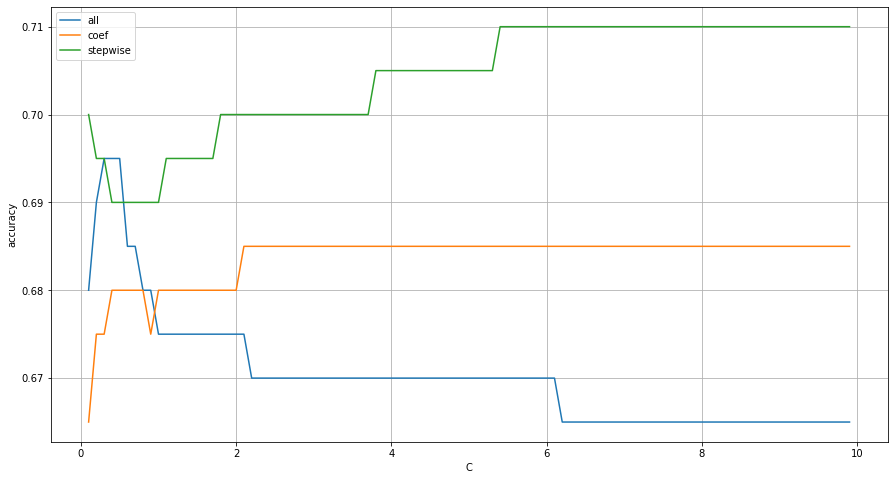

In [7]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

In [8]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

logistic=LogisticRegression(C=0.4,multi_class='ovr',solver='lbfgs')
logistic1=LogisticRegression(C=2.5,multi_class='multinomial',solver='lbfgs')
logistic2=LogisticRegression(C=6,multi_class='multinomial',solver='lbfgs')

logistic.fit(X_train,y1_train)
logistic1.fit(X_train1,y1_train1)
logistic2.fit(X_train2,y1_train2)

y_pred=logistic.predict(X_test)
y_pred1=logistic1.predict(X_test1)
y_pred2=logistic2.predict(X_test2)

print("학습 데이터 점수 : {}".format(logistic.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(logistic.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(logistic1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(logistic1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(logistic2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(logistic2.score(X_test2,y1_test2)))


학습 데이터 점수 : 0.66
평가 데이터 점수 : 0.695
학습 데이터 점수 : 0.64625
평가 데이터 점수 : 0.685
학습 데이터 점수 : 0.66
평가 데이터 점수 : 0.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


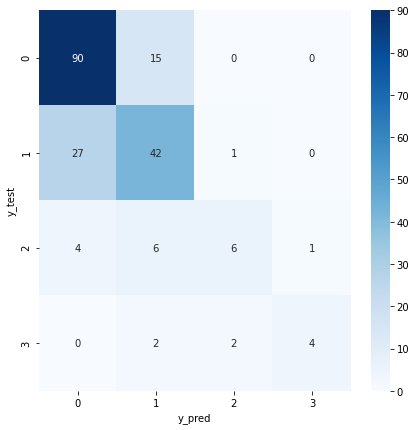

In [9]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y1_test2,y_pred2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [10]:
print(classification_report(y1_test2,y_pred2,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       105
           1       0.65      0.60      0.62        70
           2       0.67      0.35      0.46        17
           3       0.80      0.50      0.62         8

    accuracy                           0.71       200
   macro avg       0.71      0.58      0.62       200
weighted avg       0.71      0.71      0.70       200

